In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
train_dir = '../../../Final Project/Datasets/random_MRI_images/training'
validation_dir = '../../../Final Project/Datasets/random_MRI_images/testing'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2380 images belonging to 2 classes.
Found 1402 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-04-06 21:38:07.598489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-06 21:38:07.598539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 32)                2

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


2024-04-06 21:38:10.144616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-04-06 21:38:10.889146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-06 21:38:10.949511: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


74/74 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.7317

2024-04-06 21:38:50.857538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-04-06 21:38:50.967923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 62s 791ms/step - loss: 0.7152 - accuracy: 0.7317 - val_loss: 0.3854 - val_accuracy: 0.8881
Epoch 2/10
74/74 [==============================] - 57s 769ms/step - loss: 0.5734 - accuracy: 0.8130 - val_loss: 0.3646 - val_accuracy: 0.8997
Epoch 3/10
74/74 [==============================] - 56s 766ms/step - loss: 0.5083 - accuracy: 0.8454 - val_loss: 0.3093 - val_accuracy: 0.9215
Epoch 4/10
74/74 [==============================] - 56s 766ms/step - loss: 0.4109 - accuracy: 0.8633 - val_loss: 0.3551 - val_accuracy: 0.9142
Epoch 5/10
74/74 [==============================] - 56s 763ms/step - loss: 0.4749 - accuracy: 0.8650 - val_loss: 0.2747 - val_accuracy: 0.9113
Epoch 6/10
74/74 [==============================] - 57s 766ms/step - loss: 0.4009 - accuracy: 0.8820 - val_loss: 0.3581 - val_accuracy: 0.9172
Epoch 7/10
74/74 [==============================] - 56s 758ms/step - loss: 0.3661 - accuracy: 0.8905 - val_loss: 0.2122 - val_accuracy: 0.9375
Epoch 8/10

In [5]:
loss, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

2024-04-06 21:49:19.253975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


44/44 [==============================] - 21s 486ms/step - loss: 0.1591 - accuracy: 0.9429
Validation Accuracy: 94.29%


In [38]:
# model.save("mri-img-detection.h5")

In [9]:
loaded_model = load_model("mri-img-detection.h5")

In [39]:
test_image1 = load_img('../../../Final Project/Datasets/random_MRI_images/testing/mri/Te-gl_0013.jpg', target_size=(224, 224))
test_image2 = load_img('../../../Final Project/Datasets/random_MRI_images/testing/nomri/photo-1541086263351-627c0c6999aa.jpg', target_size=(224, 224))


In [40]:
test_image1 = img_to_array(test_image1) / 255.0
test_image1 = np.expand_dims(test_image1, axis=0)

test_image2 = img_to_array(test_image2) / 255.0
test_image2 = np.expand_dims(test_image2, axis=0)


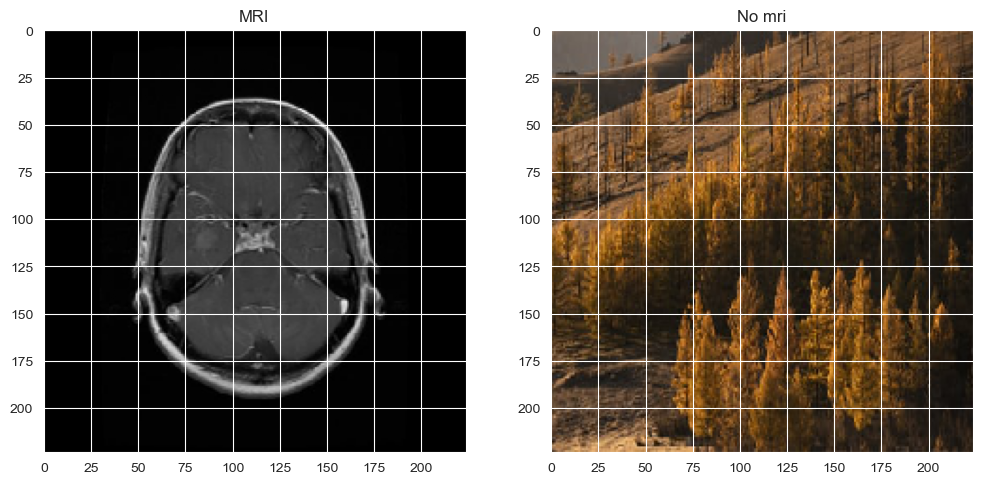

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(test_image1.squeeze(), cmap='grey')
plt.title("MRI")

plt.subplot(1,2,2)
plt.imshow(test_image2.squeeze(), cmap='grey')
plt.title("No mri")

plt.show()

In [42]:
class_labels = ["non mri", "mri"]
threshold = 0.5

prediction1 = loaded_model.predict(test_image1)
prediction2 = loaded_model.predict(test_image2)

predicted_class_label1 = class_labels[0] if prediction1 >= threshold else class_labels[1]
predicted_class_label2 = class_labels[0] if prediction2 >= threshold else class_labels[1]

print("Prediction for test image 1 (MRI):", predicted_class_label1)
print("Prediction for test image 2 (Non-MRI):", predicted_class_label2)


1/1 [==============================] - 0s 20ms/step
Prediction for test image 1 (MRI): mri
Prediction for test image 2 (Non-MRI): non mri


In [ ]:
# predictions = loaded_model.predict(validation_generator)
# predicted_classes = np.argmax(predictions, axis=1)
# true_classes = validation_generator.classes

In [28]:
# cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.xticks(ticks=[0.5, 1.5], labels=['Non-MRI', 'MRI'])
# plt.yticks(ticks=[0.5, 1.5], labels=['Non-MRI', 'MRI'])
# plt.show()

In [44]:
# gpus = tf.config.list_physical_devices('GPU')
# 
# if gpus:
#     for gpu in gpus:
#         details = tf.config.experimental.get_device_details(gpu)
#         print("GPU details:", details)
# else:
#     print("No GPU available.")


GPU details: {'device_name': 'METAL'}
